# BMIS-2542: Data Programming Essentials with Python 
##### Katz Graduate School of Business, Spring 2021


## Session-4:Data Pre-processing


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

### Handling Missing Data
For this section we will use the **soybean.csv** dataset.<br>
First, let's load the data into a `DataFrame` and observe the loaded data.

In [14]:
# we can pass the missing value indicators to the na_values parameter
dfSoy = pd.read_csv('soybean.csv', na_values = '?')
dfSoy

,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,hriveling,roots
0,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,diaporthe-stem-canker,4.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,herbicide-injury,1.0,1.0,NaN,0.0,NaN,1.0,0.0,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
305,herbicide-injury,0.0,1.0,NaN,0.0,NaN,0.0,3.0,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
306,herbicide-injury,1.0,1.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
307,herbicide-injury,1.0,1.0,NaN,0.0,NaN,1.0,3.0,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [15]:
dfSoy.shape

(309, 36)


Pandas uses the special value `NaN` (not a number) to represent missing values. In Python, `NaN` is a special floating-point value returned by certain operations when one of their results ends in an undefined value. A subtle feature of `NaN` values is that two `NaN` are never equal. Because of this, the only safe way to tell whether or not a value is missing in a DataFrame is by using the `isnull()` function. Thus, this function can be used to filter rows with missing values.

In [16]:
# missing values by variable
dfSoy.isnull().sum()

class               1
date                2
plant-stand         9
precip             13
temp                8
hail               43
crop-hist           2
area-damaged        2
severity           43
seed-tmt           43
germination        38
plant-growth        2
leaves              1
leafspots-halo     26
leafspots-marg     26
leafspot-size      26
leaf-shread        27
leaf-malf          26
leaf-mild          32
stem                2
lodging            43
stem-cankers       13
canker-lesion      13
fruiting-bodies    37
external decay     13
mycelium           13
int-discolor       13
sclerotia          13
fruit-pods         26
fruit spots        37
seed               31
mold-growth        31
seed-discolor      37
seed-size          31
hriveling          37
roots               8
dtype: int64

In [17]:
# get all the missing values in the dataframe
dfSoy.isnull().sum().sum()

768

In [18]:
dfSoy['class'].unique()

array(['diaporthe-stem-canker', 'charcoal-rot', 'rhizoctonia-root-rot',
       nan, 'phytophthora-rot', 'brown-stem-rot', 'powdery-mildew',
       'downy-mildew', 'brown-spot', 'bacterial-blight',
       'bacterial-pustule', 'purple-seed-stain', 'anthracnose',
       'phyllosticta-leaf-spot', 'alternarialeaf-spot',
       'frog-eye-leaf-spot', 'diaporthe-pod-&-stem-blight',
       'cyst-nematode', '2-4-d-injury', 'herbicide-injury'], dtype=object)

In [19]:
# missing values by class
dfSoy.isnull().groupby(dfSoy['class']).sum().sum(axis=1)

class
2-4-d-injury                    30
alternarialeaf-spot              0
anthracnose                      0
bacterial-blight                 0
bacterial-pustule                0
brown-spot                       0
brown-stem-rot                   0
charcoal-rot                     0
cyst-nematode                  144
diaporthe-pod-&-stem-blight     68
diaporthe-stem-canker            0
downy-mildew                     0
frog-eye-leaf-spot               0
herbicide-injury               100
phyllosticta-leaf-spot           0
phytophthora-rot               390
powdery-mildew                   0
purple-seed-stain                0
rhizoctonia-root-rot             0
dtype: int64

In [20]:
# check how many missing values are there for rows with no class
dfSoy[dfSoy['class'].isnull()].isnull().sum().sum()

36

#### Filtering Out Missing Data

In [21]:
anyNansRowsDropped = dfSoy.dropna() # dropna() by default drops "any" row containing missing values
anyNansRowsDropped.shape

(266, 36)

In [22]:
allNansRowsDropped = dfSoy.dropna(how = 'all') # setting how='all' will drop rows with values missing for all the columns
allNansRowsDropped.shape

(308, 36)

In [23]:
# Let's create a new column with values missing for all the rows
dfSoy['test'] = np.NAN
dfSoy.shape

(309, 37)

In [24]:
dfSoy.head()

,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,hriveling,roots,test
0,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,diaporthe-stem-canker,4.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,1.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [25]:
# Drop columns with values missing in every row
allNanColsDropped = dfSoy.dropna(axis = 1, how = 'all')
print(allNanColsDropped.shape)
allNanColsDropped.head()

(309, 36)


,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,hriveling,roots
0,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,diaporthe-stem-canker,4.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# when you want to handle the above operations on the same dataframe, use inplace=True
dfSoy = pd.read_csv('soybean.csv', na_values = '?')
print('Original Size:', dfSoy.shape)

dfSoy.dropna(how = 'all', inplace=True)
print('Size After Dropping Rows with NaN in All Columns:', dfSoy.shape)

dfSoy.dropna(how = 'any', inplace=True)
print('Size After Dropping Rows with NaN in any Column:', dfSoy.shape)

Original Size: (309, 36)
Size After Dropping Rows with NaN in All Columns: (308, 36)
Size After Dropping Rows with NaN in any Column: (266, 36)


#### Filling in Missing Data
Rather than filtering out missing data, you may want to fill in the holes in various ways. **fillna** is the workhorse function for this.

In [27]:
# Load Data
dfSoy = pd.read_csv('soybean.csv', na_values = '?')
print('Original Size:', dfSoy.shape)

Original Size: (309, 36)


In [28]:
# Calling fillna with a constant replaces missing data with that value
dfSoy.fillna(100, inplace=True) # replace all missing fields with 100
dfSoy.isnull().sum().sum() # validation: get the number of missing values after filling in

0

In [29]:
# Calling fillna() with a dict, you can use a different fill value for each column
dfSoy = pd.read_csv('soybean.csv', na_values = '?')

print('Before Calling fillna() for precip and temp columns:')
print("Records with NaN in Precip:", len(dfSoy[dfSoy.precip.isnull()])) # validation
print("Records with NaN in Temp:",len(dfSoy[dfSoy.temp.isnull()])) # validation
print()

# Call fillna()
dfSoy.fillna({'precip' : 100, 'temp':200}, inplace=True)

print('After Calling fillna() for precip and temp columns:')
print("Records with NaN in Precip:", len(dfSoy[dfSoy.precip.isnull()])) # validation
print("Records with NaN in Temp:",len(dfSoy[dfSoy.temp.isnull()])) # validation

Before Calling fillna() for precip and temp columns:
Records with NaN in Precip: 13
Records with NaN in Temp: 8

After Calling fillna() for precip and temp columns:
Records with NaN in Precip: 0
Records with NaN in Temp: 0


In [30]:
# you may want to fill missing values with associated means or medians
dfSoy = pd.read_csv('soybean.csv', na_values = '?')
dfSoy.fillna({'precip' : dfSoy['precip'].mean(), 'temp':dfSoy['temp'].median()}, inplace=True)
dfSoy

,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,hriveling,roots
0,diaporthe-stem-canker,6.0,0.0,2.000000,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,diaporthe-stem-canker,4.0,0.0,2.000000,1.0,0.0,2.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,diaporthe-stem-canker,3.0,0.0,2.000000,1.0,0.0,1.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,diaporthe-stem-canker,3.0,0.0,2.000000,1.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,diaporthe-stem-canker,6.0,0.0,2.000000,1.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,herbicide-injury,1.0,1.0,1.577703,0.0,NaN,1.0,0.0,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
305,herbicide-injury,0.0,1.0,1.577703,0.0,NaN,0.0,3.0,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
306,herbicide-injury,1.0,1.0,1.577703,0.0,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
307,herbicide-injury,1.0,1.0,1.577703,0.0,NaN,1.0,3.0,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


### Handling Duplicates

In [31]:
# Removing Duplicates
dfSoy = pd.read_csv('soybean.csv', na_values = '?')
print('Original Size', dfSoy.shape)
dfSoy.drop_duplicates(inplace=True)
print('Size After Dropping Duplicates', dfSoy.shape)

Original Size (309, 36)
Size After Dropping Duplicates (304, 36)


## Detecting and Filtering Outliers

Filtering or transforming outliers is largely a matter of applying array operations. However, a boxplot can be helpful in visualizing potential outliers.

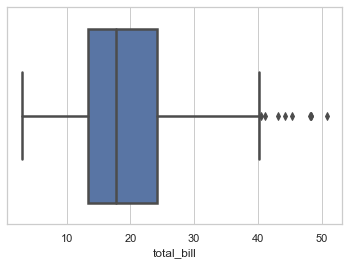

In [36]:
sns.set(style="whitegrid")

tips = sns.load_dataset("tips") # loading the tips dataset
sns.boxplot(x=tips["total_bill"], linewidth=2.5);

In [33]:
# Remove outliers based on the IQR (Inter Quratile Range)
bill_q1 = tips['total_bill'].quantile(0.25) # Q1
bill_q3 = tips['total_bill'].quantile(0.75) # Q3
outlier_margin = bill_q3+((bill_q3-bill_q1)*1.5) # Q3-Q1 is the IQR. Data points outside 1.5 IQR are considered to be outliers

print('Q1:', bill_q1, 'Q3:', bill_q3, 'Outlier Margin:', outlier_margin)
outliersRemoved=tips[tips['total_bill'] < outlier_margin]

print('Original DataFrame Size:', tips.shape)
print('DataFrame Size after Outliers Removed:', outliersRemoved.shape)
outliersRemoved.head()

Q1: 13.3475 Q3: 24.127499999999998 Outlier Margin: 40.29749999999999
Original DataFrame Size: (244, 7)
DataFrame Size after Outliers Removed: (235, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Computing Dummy Variables

In [34]:
import seaborn as sns

tips = sns.load_dataset("tips") # loading the tips dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [35]:
dfDummies = pd.get_dummies(tips['smoker'], prefix='smoker')
tips.join(dfDummies)# Add the new dummy variables to parent data frame

,total_bill,tip,sex,smoker,day,time,size,smoker_Yes,smoker_No
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,0,1
